## EDA of Obesity data


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving obesity-cleaned.csv to obesity-cleaned.csv
User uploaded file "obesity-cleaned.csv" with length 1120344 bytes


In [12]:
# Load Dataset

data = pd.read_csv('obesity-cleaned.csv', index_col=0)
data.head()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24570 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      24570 non-null  object
 1   Year         24570 non-null  int64 
 2   Obesity (%)  24570 non-null  object
 3   Sex          24570 non-null  object
dtypes: int64(1), object(3)
memory usage: 959.8+ KB


In [14]:
data['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [17]:
data.isna().sum()

Country        0
Year           0
Obesity (%)    0
Sex            0
dtype: int64

In [15]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

In [18]:
data.Year.unique()

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [0]:
x = "0.5 [0.2-1.1"

In [21]:
data["Obesity (%)"].unique()

array(['0.5 [0.2-1.1]', '0.2 [0.0-0.6]', '0.8 [0.2-2.0]', ...,
       '24.4 [18.8-30.6]', '24.8 [18.9-31.3]', '4.7 [2.5-8.0]'],
      dtype=object)

In [0]:
data["Obesity"]= data["Obesity (%)"].apply(lambda x: (x.split(" ")[0]))

In [0]:
data2 = data[data["Obesity"] != "No"]

In [30]:
data2.head()

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2


In [0]:
data2["Obesity"] = data2["Obesity"].apply(lambda x: float(x))

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24066 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24066 non-null  object 
 1   Year         24066 non-null  int64  
 2   Obesity (%)  24066 non-null  object 
 3   Sex          24066 non-null  object 
 4   Obesity      24066 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB


In [0]:
data3 = data2.drop("Obesity (%)",axis="columns")

In [36]:
data3.head()

,Country,Year,Sex,Obesity
0,Afghanistan,1975,Both sexes,0.5
1,Afghanistan,1975,Male,0.2
2,Afghanistan,1975,Female,0.8
3,Afghanistan,1976,Both sexes,0.5
4,Afghanistan,1976,Male,0.2


#EDA


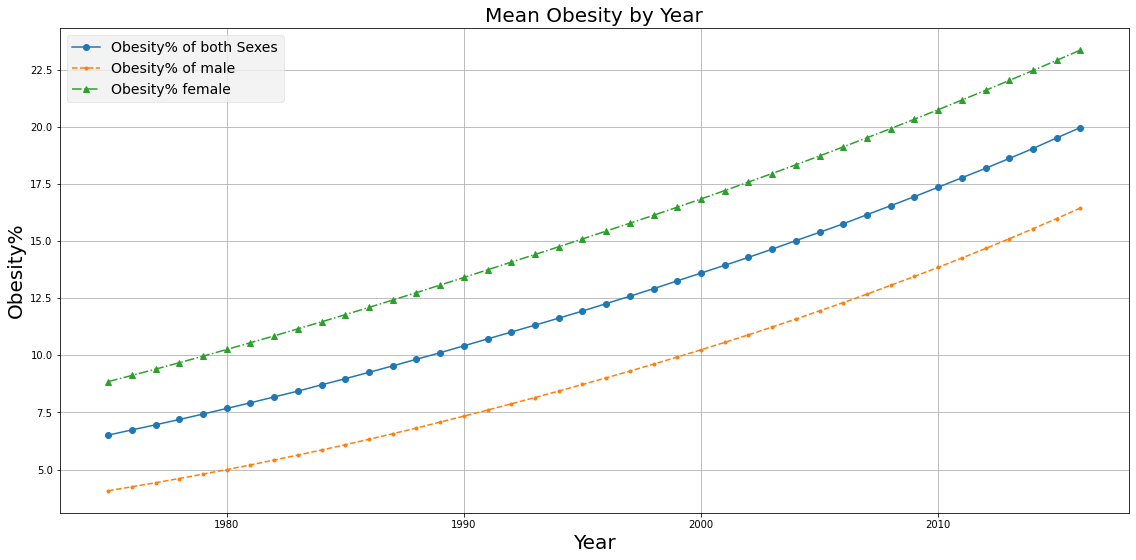

In [37]:
rcParams['figure.figsize'] = 16, 8
all_sexes = data3[data3["Sex"]=="Both sexes"].groupby("Year").Obesity.mean()
male = data3[data3["Sex"]=="Male"].groupby("Year").Obesity.mean()
female = data3[data3["Sex"]=="Female"].groupby("Year").Obesity.mean()
plt.plot(all_sexes,linestyle='solid',marker='o',label="Obesity% of both Sexes")
plt.plot(male,linestyle='dashed',marker='.',label="Obesity% of male")
plt.plot(female,linestyle='dashdot',marker='^',label="Obesity% female")
plt.xlabel('Year', fontsize=20)
plt.ylabel('Obesity%', fontsize=20)
plt.title('Mean Obesity by Year', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()

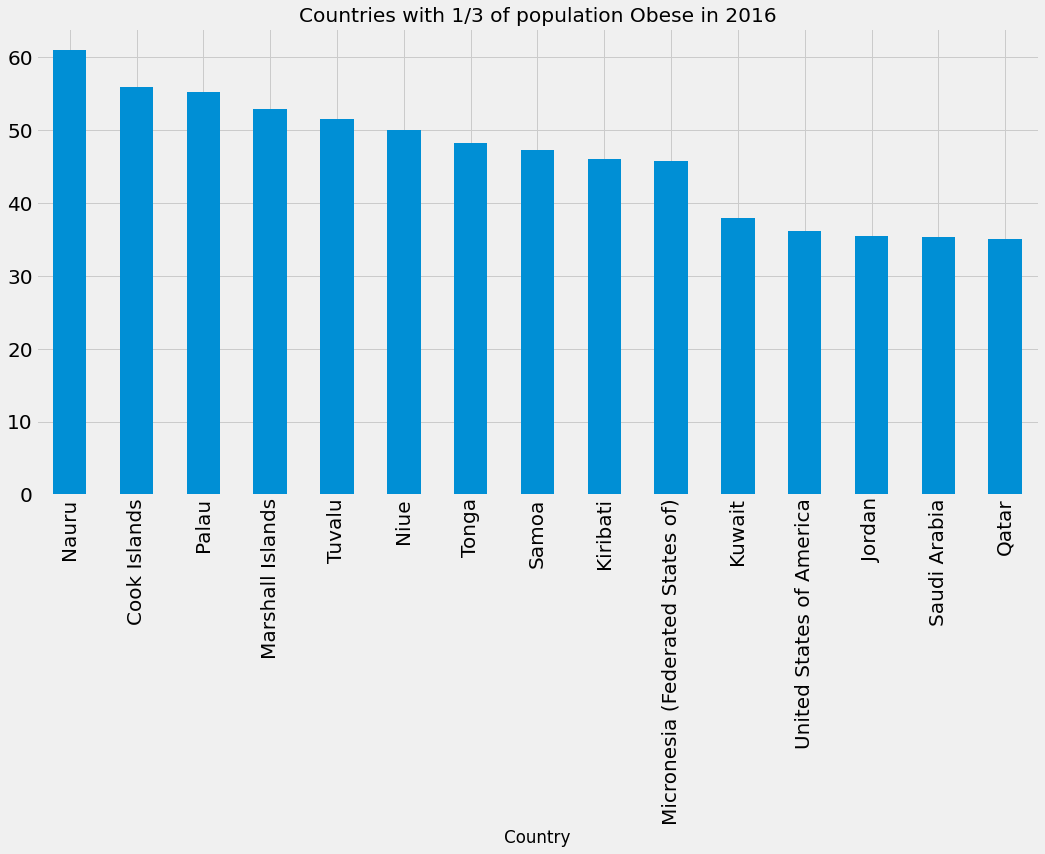

In [38]:
fig = plt.figure(figsize=(16,8))
 
top_obese_countries = data3[(data3["Year"]==2016) & (data3["Sex"]=="Both sexes") & (data3["Obesity"] > 33)].groupby("Country").Obesity.sum().sort_values(ascending=False)
top_obese_countries.plot(kind="bar",title='Countries with 1/3 of population Obese in 2016', fontsize=20)

In [0]:
countries = data3["Country"].unique()

In [0]:
years = data3["Year"].unique()

In [0]:
df_all_sexes = pd.DataFrame()
df_male = pd.DataFrame()
df_female = pd.DataFrame()
d = {}
m = {}
f = {}
for country in countries:
    d["Country"] = country
    m["Country"] = country
    f["Country"] = country
    for year in years:
        d[year] = data3[(data3["Country"] == country) & (data3["Year"] == year) & (data3["Sex"]=="Both sexes")].Obesity.iloc[0]
        m[year] = data3[(data3["Country"] == country) & (data3["Year"] == year) & (data3["Sex"]=="Male")].Obesity.iloc[0]
        f[year] = data3[(data3["Country"] == country) & (data3["Year"] == year) & (data3["Sex"]=="Female")].Obesity.iloc[0]
    df_all_sexes = df_all_sexes.append(d, ignore_index=True)
    df_male = df_male.append(m, ignore_index=True)
    df_female = df_female.append(f, ignore_index=True)

In [42]:
df_all_sexes.head()

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Country
0,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.8,0.8,0.9,1.0,1.0,1.1,1.2,1.2,1.3,1.4,1.5,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.6,2.7,2.9,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.7,4.9,5.2,5.5,Afghanistan
1,6.5,6.7,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.3,8.5,8.7,9.0,9.3,9.5,9.8,10.1,10.4,10.7,11.0,11.3,11.7,12.0,12.4,12.8,13.2,13.6,14.0,14.5,14.9,15.4,16.0,16.5,17.0,17.6,18.2,18.8,19.3,19.9,20.5,21.1,21.7,Albania
2,6.9,7.2,7.4,7.7,8.0,8.3,8.6,9.0,9.4,9.7,10.2,10.6,11.0,11.5,11.9,12.4,12.8,13.3,13.8,14.3,14.8,15.3,15.8,16.3,16.8,17.4,17.9,18.5,19.1,19.6,20.2,20.8,21.4,22.0,22.7,23.3,24.0,24.7,25.3,26.0,26.7,27.4,Algeria
3,12.9,13.5,14.0,14.5,15.0,15.5,16.0,16.5,16.9,17.4,17.8,18.2,18.6,19.0,19.3,19.6,19.9,20.2,20.4,20.7,21.0,21.2,21.5,21.7,22.0,22.2,22.5,22.7,22.9,23.2,23.4,23.6,23.8,24.0,24.2,24.4,24.6,24.8,25.0,25.2,25.4,25.6,Andorra
4,0.8,0.9,0.9,1.0,1.1,1.1,1.2,1.3,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.2,2.3,2.4,2.6,2.7,2.9,3.1,3.2,3.4,3.6,3.8,4.1,4.3,4.5,4.8,5.0,5.3,5.6,5.9,6.2,6.5,6.8,7.1,7.5,7.9,8.2,Angola


In [43]:
df_female.head()

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Country
0,0.8,0.8,0.9,0.9,1.0,1.1,1.1,1.2,1.3,1.4,1.5,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.6,2.7,2.9,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.7,4.9,5.2,5.4,5.7,6.0,6.3,6.6,7.0,7.3,7.6,Afghanistan
1,8.6,8.8,8.9,9.1,9.3,9.5,9.7,9.9,10.1,10.3,10.6,10.8,11.0,11.3,11.5,11.7,12.0,12.2,12.5,12.8,13.1,13.4,13.7,14.0,14.3,14.7,15.0,15.4,15.8,16.2,16.6,17.1,17.5,18.0,18.4,18.9,19.4,19.9,20.4,20.8,21.3,21.8,Albania
2,10.7,11.1,11.4,11.8,12.2,12.7,13.1,13.6,14.1,14.6,15.2,15.7,16.3,16.9,17.5,18.1,18.7,19.3,19.9,20.5,21.1,21.7,22.4,23.0,23.6,24.2,24.9,25.5,26.2,26.8,27.5,28.2,28.8,29.5,30.2,30.9,31.5,32.2,32.9,33.6,34.2,34.9,Algeria
3,15.8,16.4,16.9,17.5,18.0,18.5,18.9,19.4,19.8,20.2,20.6,21.0,21.3,21.6,21.8,22.1,22.3,22.5,22.6,22.8,23.0,23.1,23.3,23.5,23.6,23.8,23.9,24.0,24.1,24.3,24.4,24.5,24.5,24.6,24.7,24.8,24.9,25.0,25.1,25.1,25.2,25.3,Andorra
4,1.4,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.2,2.3,2.4,2.6,2.7,2.9,3.1,3.2,3.4,3.6,3.8,4.1,4.3,4.5,4.8,5.1,5.3,5.6,5.9,6.3,6.6,6.9,7.3,7.7,8.0,8.4,8.8,9.3,9.7,10.2,10.6,11.1,11.6,12.1,Angola


In [0]:
df_all_sexes['variation'] = df_all_sexes[2016] - df_all_sexes[1975]
df_male['variation'] = df_male[2016] - df_male[1975]
df_female['variation'] = df_female[2016] - df_female[1975]

In [45]:
df_all_sexes['variation'].describe()

count    191.000000
mean      13.449738
std        6.248738
min        2.000000
25%        8.100000
50%       13.400000
75%       17.000000
max       33.700000
Name: variation, dtype: float64

In [46]:
df_male['variation'].describe()

count    191.000000
mean      12.366492
std        7.327628
min        1.500000
25%        4.750000
50%       13.400000
75%       17.150000
max       34.600000
Name: variation, dtype: float64

In [48]:
df_female["variation"].describe()

count    191.00000
mean      14.50000
std        6.34097
min        1.80000
25%        9.85000
50%       13.30000
75%       19.05000
max       32.70000
Name: variation, dtype: float64

In [50]:
df_all_sexes[df_all_sexes['variation'] == df_all_sexes['variation'].max()]

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Country,variation
176,17.9,18.6,19.4,20.1,20.9,21.7,22.5,23.3,24.2,25.0,25.9,26.8,27.8,28.8,29.7,30.7,31.7,32.7,33.6,34.5,35.4,36.2,37.0,37.8,38.5,39.3,40.0,40.8,41.5,42.3,43.1,43.9,44.7,45.5,46.2,47.0,47.8,48.6,49.4,50.1,50.9,51.6,Tuvalu,33.7


In [51]:
df_male[df_male['variation'] == df_male['variation'].max()]

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Country,variation
176,12.4,13.0,13.6,14.2,14.9,15.5,16.3,17.0,17.8,18.5,19.4,20.2,21.1,22.0,23.0,24.0,24.9,25.9,26.8,27.8,28.7,29.6,30.4,31.2,32.1,32.9,33.7,34.5,35.4,36.3,37.1,38.0,38.9,39.8,40.7,41.7,42.6,43.5,44.4,45.3,46.2,47.0,Tuvalu,34.6


In [52]:
df_female[df_female['variation'] == df_female['variation'].max()]

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Country,variation
176,23.5,24.4,25.3,26.1,27.0,28.0,28.9,29.8,30.8,31.7,32.7,33.6,34.6,35.6,36.6,37.7,38.6,39.6,40.5,41.4,42.2,43.0,43.7,44.5,45.1,45.8,46.5,47.2,47.8,48.5,49.2,49.8,50.5,51.2,51.8,52.5,53.2,53.8,54.4,55.0,55.6,56.2,Tuvalu,32.7


In [53]:
df_all_sexes[df_all_sexes["variation"] == df_all_sexes["variation"].min()]

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Country,variation
187,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.8,0.9,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,2.0,2.1,Viet Nam,2.0


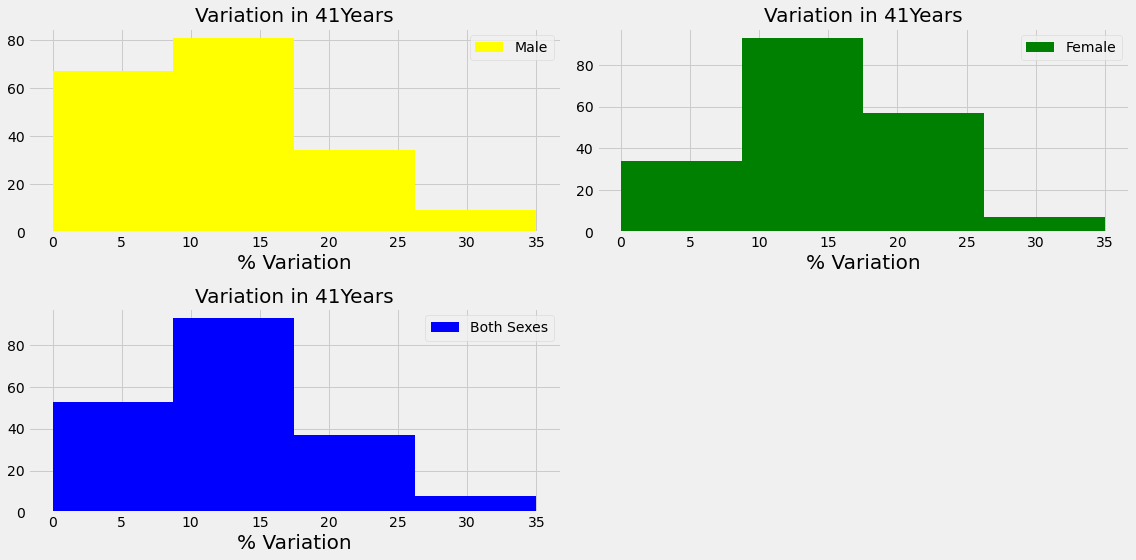

In [54]:
fig = plt.figure()
plt.subplot(2, 2, 1)
rcParams['figure.figsize'] = 16, 8
bins=np.linspace(0, 35, 5)
plt.hist(df_male["variation"],bins=bins, facecolor='yellow', label="Male" )
plt.xlabel('% Variation', fontsize=20)
plt.title('Variation in ' + str(2016-1975) + 'Years', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.subplot(2, 2, 2)
plt.hist(df_female["variation"],bins=bins, facecolor='green', label="Female" )
plt.xlabel('% Variation', fontsize=20)
plt.title('Variation in ' + str(2016-1975) + 'Years', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.subplot(2, 2, 3)
plt.hist(df_all_sexes["variation"],bins=bins,facecolor='blue', label="Both Sexes")
plt.xlabel('% Variation', fontsize=20)
plt.title('Variation in ' + str(2016-1975) + 'Years', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()

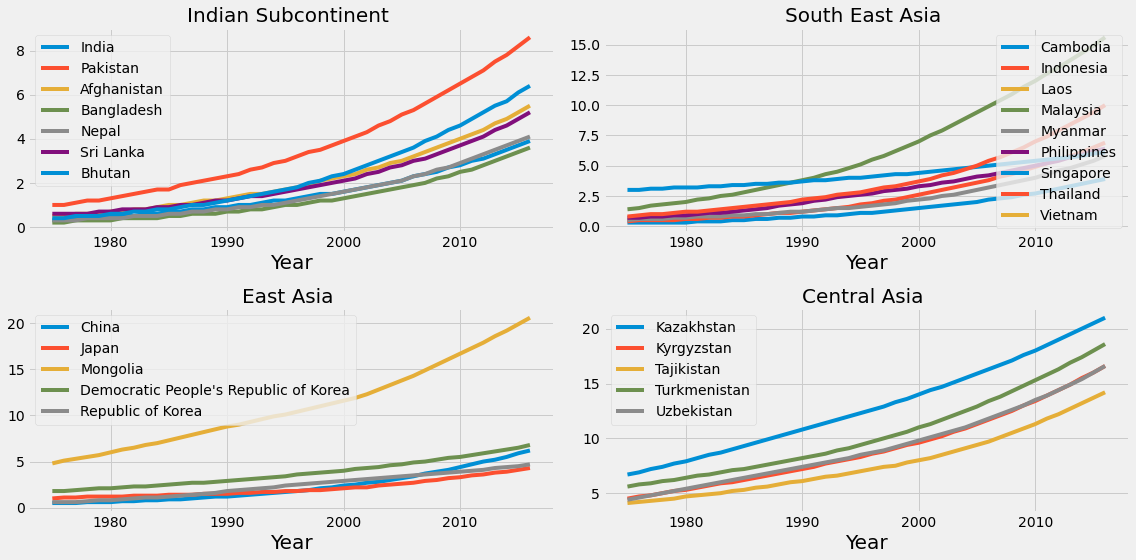

In [60]:
rcParams['figure.figsize'] = 16, 8
fig = plt.figure()
plt.subplot(2, 2, 1)
countries = ["India","Pakistan","Afghanistan","Bangladesh","Nepal","Sri Lanka","Bhutan"]
for country in countries:
    plt.plot(data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Year,data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Obesity, label=country )
plt.xlabel('Year', fontsize=20)
plt.title('Indian Subcontinent ', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.subplot(2, 2, 2)
countries = ["Cambodia","Indonesia","Laos","Malaysia","Myanmar","Philippines","Singapore","Thailand","Vietnam"]
for country in countries:
    plt.plot(data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Year,data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Obesity, label=country )
plt.xlabel('Year', fontsize=20)
plt.title('South East Asia ', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.subplot(2, 2, 3)
countries = ["China","Japan","Mongolia","Democratic People's Republic of Korea","Republic of Korea"]
for country in countries:
    plt.plot(data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Year,data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Obesity, label=country )
plt.xlabel('Year', fontsize=20)
plt.title('East Asia ', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.subplot(2, 2, 4)
countries = ["Kazakhstan","Kyrgyzstan","Tajikistan","Turkmenistan","Uzbekistan"]
for country in countries:
    plt.plot(data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Year,data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Obesity, label=country )
plt.xlabel('Year', fontsize=20)
plt.title('Central Asia ', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()

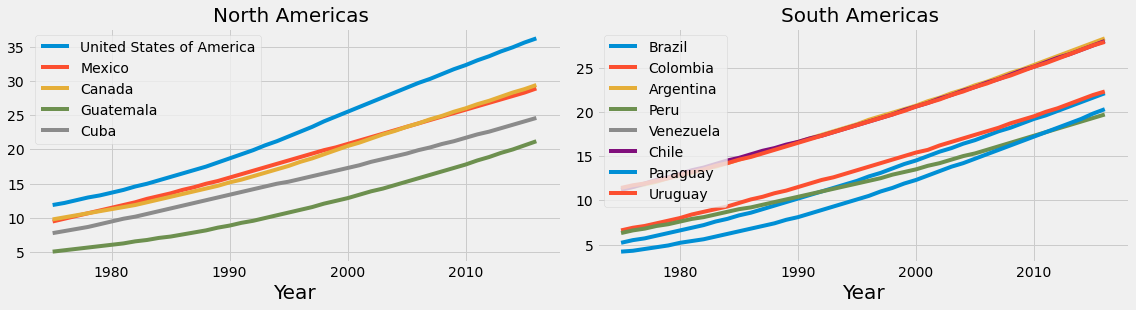

In [62]:
rcParams['figure.figsize'] = 16, 8
fig = plt.figure()
plt.subplot(2, 2, 1)
countries = ["United States of America","Mexico","Canada","Guatemala","Cuba"]
for country in countries:
    plt.plot(data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Year,data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Obesity, label=country )
plt.xlabel('Year', fontsize=20)
plt.title('North Americas ', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.subplot(2, 2, 2)
countries = ["Brazil","Colombia","Argentina","Peru","Venezuela","Chile","Paraguay","Uruguay"]
for country in countries:
    plt.plot(data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Year,data3[(data3["Country"]==country) & (data3["Sex"]=="Both sexes")].Obesity, label=country )
plt.xlabel('Year', fontsize=20)
plt.title('South Americas ', fontsize=20)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Observations
 - Obesity rate of male & female follows the same curve, however, females are more susceptible to obesity than men
 - 15 countries have more than 1/3 of population obese
 -6 countries have more than 1/2 of the population Obese i.e. Nauru, Cook Islands, Palau, Marshall Islands, Tuvalu, Niue
 -In past 41 years
  - Average Variation of Obesity is 12% among the Men
  - Average Variation of Obesity is 14.5% among the Women
  - Tuvalu had variation for over 33.7%
  - VietNam has the least variation of 2%
  - Obesity Variation among females is on higher side then men

# To Do
 - Map it with data of continents
 - Map with dietary habits
 - Map it with population